In [1]:
# 回调函数
# 是在模型的训练过程中进行调用实现的，作为一个参数传入model.fit()中

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.0.0


In [2]:
# 获取图片数据集
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test,y_test) = fashion_mnist.load_data()
# 将训练集拆分为训练集和验证集 共60000张图片，前5000张为验证集，后55000张为训练集
x_valid,x_train = x_train_all[:5000],x_train_all[5000:]
y_valid,y_train = y_train_all[:5000],y_train_all[5000:]

print(x_valid.shape,y_valid.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [3]:
# x = (x - u)/std  u:均值  std:标准差
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# 进行转换：  只能对二位矩阵进行处理，所以要将三维矩阵先转为二维，之后再转换回去
# 又因为原数据为int型，因要做除法，所以先转为float型
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28) 

# scaler.fit_transform与scaler.transform的区别为前者会记录均值与标准差的值
# 当再用scaler.transform的时候就不用计算均值与标准差了
x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

In [4]:
#构建分类训练模型 

# tf.keras.models.Sequential()
# 定义一个顺序模型
model = keras.models.Sequential()

'''  
# 将输入矩阵[28,28]经过第一层后展平为[28*28,1]
model.add(keras.layers.Flatten(input_shape=[28,28]))
# 全连接层Dense,输出为300个节点
# relu: y = max(0, x)
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
# 最后输出10个分类,softmax会将向量变为概率
model.add(keras.layers.Dense(10,activation='softmax'))
'''

# 另一种构建模型的方式，传入一个列表，列表中为各层
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

# 损失函数loss:用sparse是因为每个y_train是一个值，而不是一个向量，需要将其转换为[10,1]的向量
# 若y_train本来就是向量的话，损失函数用categorical_crossentropy
model.compile(loss='sparse_categorical_crossentropy', 
             optimizer = 'adam',
             metrics = ["accuracy"])    # 指标metrics  关系模型的精确度accuracy

In [5]:
# 这里使用三个callback函数，TensorBoard, EarlyStopping, ModelCheckpoint
# Tensorboard需要一个文件夹，ModelCheckpoint需要一个文件名
# logdir = './callbacks'  此处报错，改用下行
logdir = os.path.join("callbacks")
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir, "fashion_mnist_model.h5")

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file, save_best_only = True), # save_best_only保存最好的模型，否则保存最近的模型
#     如果连续5次迭代的变化值都小于min_delta，则停止训练
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3)
]
# 开始训练  返回值为训练过程中的历史数据, 可用于画图分析训练效果
history = model.fit(x_train_scaled, y_train, epochs=10, validation_data=(x_valid_scaled, y_valid), callbacks = callbacks)

callbacks
Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 13s 242us/sample - loss: 0.4576 - accuracy: 0.8327 - val_loss: 0.3559 - val_accuracy: 0.8766
Epoch 2/10
55000/55000 [==============================] - 10s 179us/sample - loss: 0.3533 - accuracy: 0.8704 - val_loss: 0.3289 - val_accuracy: 0.8792
Epoch 3/10
55000/55000 [==============================] - 15s 281us/sample - loss: 0.3179 - accuracy: 0.8827 - val_loss: 0.3215 - val_accuracy: 0.8810
Epoch 4/10
55000/55000 [==============================] - 18s 332us/sample - loss: 0.2924 - accuracy: 0.8902 - val_loss: 0.3132 - val_accuracy: 0.8898
Epoch 5/10
55000/55000 [==============================] - 13s 232us/sample - loss: 0.2731 - accuracy: 0.8978 - val_loss: 0.3179 - val_accuracy: 0.8854
Epoch 6/10
55000/55000 [==============================] - 17s 310us/sample - loss: 0.2586 - accuracy: 0.9031 - val_loss: 0.3173 - val_accuracy: 0.8874
Epoch 7/10
55000/55000 [===========

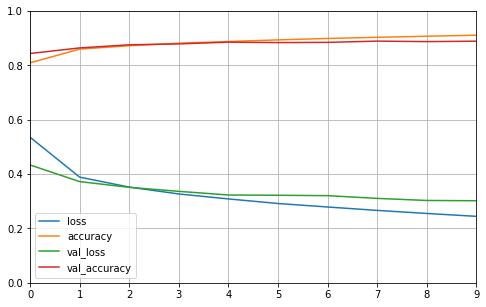

In [14]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
# 当前的图表和子图可以使用plt.gcf()和plt.gca()获得，分别表示"Get Current Figure"和"Get Current Axes"
# 设置y坐标的上下限
    plt.gca().set_ylim(0, 1)  
    plt.show()
    
plot_learning_curves(history)